# Activité niveau PC : Propagation dispersive d’un paquet d’onde dans un plasma

On s'intéresse ici à la propagation unidimensionnelle (selon $\vec{e}_x$) du champ électrique $\vec{E}$ d'une onde électromagnétique dans le vide et dans un plasma, en utilisant le modèle de plasma développé en cours (plasma neutre, peu dense et de densité constante, sans mouvement d'ions, électrons non relativistes et avec un mouvement faible devant la longueur d'onde de l'onde électromagnétique).

L'équation de propagation du champ électrique est :
- $\Delta \vec{E} - \dfrac{1}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2}=\vec{0}$ dans le vide, avec $c$ la vitesse de la lumière dans le vide.
- $\Delta \vec{E} - \dfrac{1}{c^2} \left(\omega_p^2 \vec{E} + \dfrac{\partial^2 \vec{E}}{\partial t^2}\right) =\vec{0}$ dans le plasma, avec $\omega_p=\sqrt{\dfrac{n e^2}{m \epsilon_0}}$ la pulsation plasma électronique, où $n$ est la densité numérique d'électrons (en nombre par unité de volume), $e$ la charge élémentaire, $\epsilon_0$ la permitivité diélectrique du vide.

Puisque ces deux équations de propagation sont linéaires, on peut effectuer une analyse harmonique.

Les valeurs numériques utilisées ici sont typiques de l'interaction d'un laser titane-saphir (laser impulsionnel intense de longueur d'onde autour de $0.8 ~\rm \mu m$) avec un plasma peu dense (typiquement produit par un jet de gaz ionisé par le laser lui-même ou par un autre laser), qui est une configuration très étudiée en recherche pour la production de faisceaux d'électrons énergétiques par laser (par un mécanisme non décrit par notre modèle simple).

---

**Contexte de la séance :**
- Notions déja vues en cours : 
    - Propagation unidimensionnelle d’une onde harmonique dans un milieu linéaire. 
    - Dispersion, absorption. 
    - Propagation d’un paquet d’ondes dans un milieu non absorbant et faiblement dispersif : vitesse de phase et vitesse de groupe. 

- Notions abordées ici : 
    - Rappel et application des notions précédentes
    - Capacité numérique : À l’aide d’un langage de programmation, simuler la propagation d’un paquet d’ondes dans un milieu dispersif et visualiser le phénomène d’étalement

**Déroulement de la séance (2h sur ordinateur, en binômes) :**
- Questions de cours à préparer en amont de la séance.
- La séance est divisée en 3 parties (environ 30 min/partie), faire un appel à la fin de chaque partie.
- Compte rendu à rendre à la fin de la séance sous format pdf (exporter depuis File > Download as > pdf via LaTeX).
- Corrections et remédiation à la fin de la séance et/ou à la séance suivante.

---

**Rappels de syntaxe Python et du fonctionnement des notebook Jupyter :**
*Non détaillé ici*

**Rappels de syntaxe Markdown et LaTeX :**
*Non détaillé ici*

---
<!--Idée : Dans tout les cas, on compare vide et plasma.
part1=rappel de cours. L'objectif est de remobiliser les connaissances vues en cours afin d'arriver en TP avec ces connaissances.
part2=ondes planes de différentes longueurs d'onde, on regarde la vitesse de propagation d'un maximum, c'est la vitesse de phase. L'objectif est de montrer le phénomène de dispersion avec 2 OPPH de longueurs d'ondes différentes qui se propagent à des vitesses différentes, ainsi que d'illustrer le concept de vitesse de phase.
part3=notion de paquet d'onde, vitesse de groupe.  L'objectif est de comprendre que la superposition d'OPPH peut amener à la formation d'un paquet d'onde.
part4 = propagation d'un paquet d'onde dans un milieu dispersif. L'objectif est de comprendre l'importance de la vitesse de phase et de groupe dans la propagation d'un paquet d'onde, et de visualiser son étalement au cours de sa propagation.-->

## Partie 0 : Questions de cours
On demande ici quelques rappels du cours sur la propagation des ondes, afin d'arriver bien préparé à la séance.

**Q0.1 :** Rappelez la méthode permettant d'obtenir la relation de dispersion (relation entre le nombre d'onde complexe $\underline{k}=k'+ik''$ et la pulsation $\omega$ de l'onde harmonique) dans le vide et dans un plasma, et donner leurs expressions.

*Pour obtenir la relation de dispersion, on injecte une solution en onde plane $\underline{\vec{E}}= \vec{E_0} e^{-i(\omega t-\underline{k} x)}$ dans l'équation de propagation de l'onde. Dans le vide, on obtiens $\underline{k}^2=\omega^2/c^2$, alors que pour le modèle de plasma développé ici on a $\underline{k}^2 = \frac{\omega^2 - \omega_p^2}{c^2}$ avec $\omega_p=\sqrt{\frac{n_e e^2}{m_e \epsilon_0}}$.* <!-- vérif calculs-->

**Q0.2 :** Quelle est la condition pour qu'une onde électromagnétique plane progressive harmonique (OPPH) se propage dans le plasma ? La propagation se fait elle avec absorption d'énergie ?

*Il est nécessaire d'avoir $\omega > \omega_p$, sinon l'onde est évanescente. En effet, si $\omega <\omega_p$ alors $k$ est imaginaire pur et le champ électrique vaut $\tilde{E} = \vec{E_0} e^{-i(kx-\omega t)} = \vec{E_0} e^{-i \omega t} e^{- k^{\prime \prime} x}$ avec $k^{\prime \prime}$ réel. Si $\omega > \omega_p$, on a $\underline{k}$ purement réel et il n'y a pas d'atténuation de l'onde lors de sa propagation, donc pas d'absorption.*

**Q0.3 :** Nous considérons une OPPH qui se propage dans le plasma. Quelle est sa vitesse de phase, notée ici $v_\phi$ ? Est elle supérieure ou inférieure à la vitesse de la lumière dans le vide $c$ ?

*La vitesse de phase est $v_\phi = \frac{\omega}{k}=\frac{c}{\sqrt{1-(\omega_p/\omega)^2}}$. Pour qu'une onde se propage dans le plasma, $\omega > \omega_p$ donc $v_\phi>c$. Ce n'est pas en contradiction avec la relativité restreinte car la phase ne transporte par d'énergie ni d'information (hors programme).*

## Partie 1 : Propagation d'ondes planes dans le vide et dans un milieu non absorbant et dispersif.
L'objectif de cette partie est d'illustrer le phénomène de dispersion en considérant 2 OPPH de longueurs d'ondes dans le vide $\lambda$ différentes. Ces OPPH sont initialement en phase, et se propagent sur une distance définie dans le vide et dans un plasma. On regarde alors comment se sont comportées ces différentes OPPH lors de leur propagation.

On choisit comme valeurs numériques :
- $n = 10^{24} ~\rm m^{-3}$
- $\lambda_1 = 0.8 \times 10^{-6} ~\rm m$
- $\lambda_2 = 1.6 \times 10^{-6} ~\rm m$
- Les phases à l'origine des deux ondes sont nulles

Le prochain bloc initialise le programme Python en important les modules nécessaires et en définissant les fonctions nécessaires dans la suite.
Le bloc suivant définit les données du problème et affiche les courbes.

In [1]:
# Import des modules et formatage des affichages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

# Définition des constantes physiques
c = 3.00e8 # m/s (célérité de la lumière dans le vide)
m = 9.11e-31 # kg (masse de l'électron)
epsilon_0 = 8.85e-12 # F/m (permitivité diélectrique du vide)
e = 1.60e-19 # C (charge de l'électron)

# Définition des fonctions
def k_vide(omega): # nombre d'onde pour une OPPH dans le vide
    return omega/c # LIGNE A COMPLETER

def k_plasma(omega, omega_p): # nombre d'onde pour une OPPH dans le plasma
    return np.sqrt(omega**2 - omega_p**2)/c # LIGNE A COMPLETER

def E_onde(k, x, omega, t): # amplitude de l'onde
    return np.cos(k*x - omega*t)

**Q1.1 :** Complétez les relations de dispersion dans les fonctions `k_vide` et `k_plasma`.

Text(0.5, 1.0, 'Onde plane dans le plasma')

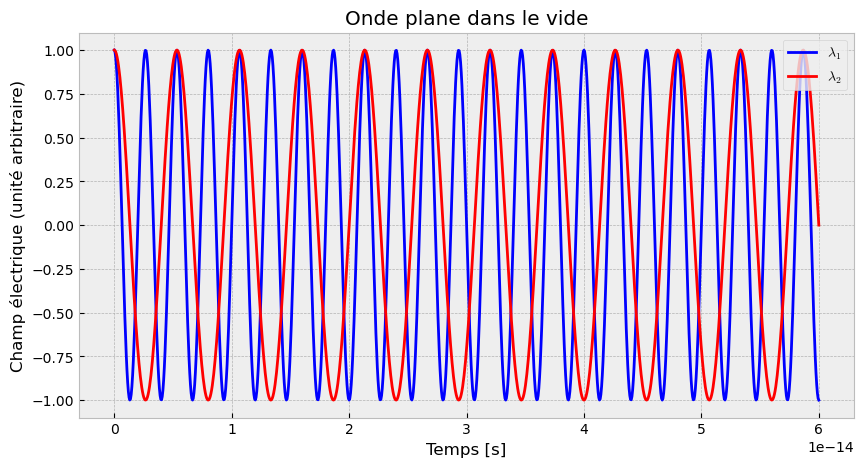

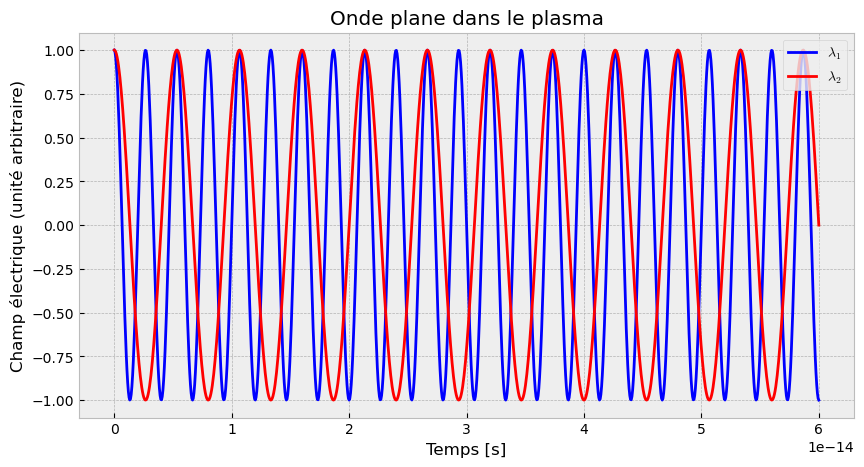

In [2]:
# Définition des données du problème
n = 1.1e24 # m^-3
omega_p = np.sqrt(n * e**2/(m * epsilon_0))

lambda_1 = 0.8e-6 # m
lambda_2 = 1.6e-6 # m
omega_1 = 2*np.pi*c/lambda_1 # rad/s
omega_2 = 2*np.pi*c/lambda_2 # rad/s

# Affichage des ondes planes dans le vide et dans le plasma, pour x=0 m et t entre 0 et 60 fs
x = 0.0 # m
t = np.linspace(0, 60e-15, 1000) # s

E_vide_1 = E_onde(k_vide(omega_1), x, omega_1, t)
E_vide_2 = E_onde(k_vide(omega_2), x, omega_2, t)

E_plasma_1 = E_onde(k_plasma(omega_1, omega_p), x, omega_1, t)
E_plasma_2 = E_onde(k_plasma(omega_2, omega_p), x, omega_2, t)

plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide_1, 'b', label="$\lambda_1$")
plt.plot(t, E_vide_2, 'r', label="$\lambda_2$")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Onde plane dans le vide")

plt.figure(2, figsize=(10,5))
plt.plot(t, E_plasma_1, 'b', label="$\lambda_1$")
plt.plot(t, E_plasma_2, 'r', label="$\lambda_2$")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Onde plane dans le plasma")

**Q1.2 :** On s'intéresse à la variation du champ $\vec{E}$ en fonction du temps, à une abscisse $x$ fixée. On prends l'abscisse $x=0 ~\rm m$ pour référence, telle que le maximum de l'onde 2 coïncide toujours avec un maximum de l'onde 1 dans le vide et dans le plasma. Modifiez maintenant le script pour observer l'amplitude des OPPH à $x=3 ~\rm mm$. Le maximum de l'onde 2 coïncide t'il toujours à un maximum de l'onde 1 dans le vide ? Dans le plasma ? Pourquoi ?

*Dans le vide les deux OPPH se propagent à la même vitesse et les maximums de l'onde 2 coïncident toujours avec un maximum de l'onde 1. Ce n'est plus vrai dans le plasma, car ce milieu est dispersif. Ceci est confirmé par le calcul des vitesses de phases dans chaque situation. On observe d'ailleurs que la vitesse de phase des OPPH dans le plasma est >c.*

Vitesse de phase dans le vide, onde 1 : 3.00000e+08
Vitesse de phase dans le vide, onde 2 : 3.00000e+08
Vitesse de phase dans le plasma, onde 1 : 3.00094e+08
Vitesse de phase dans le plasma, onde 2 : 3.00378e+08


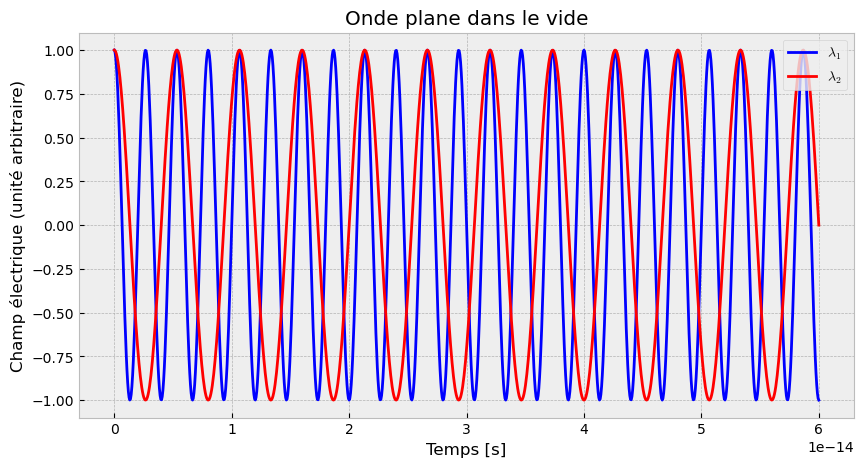

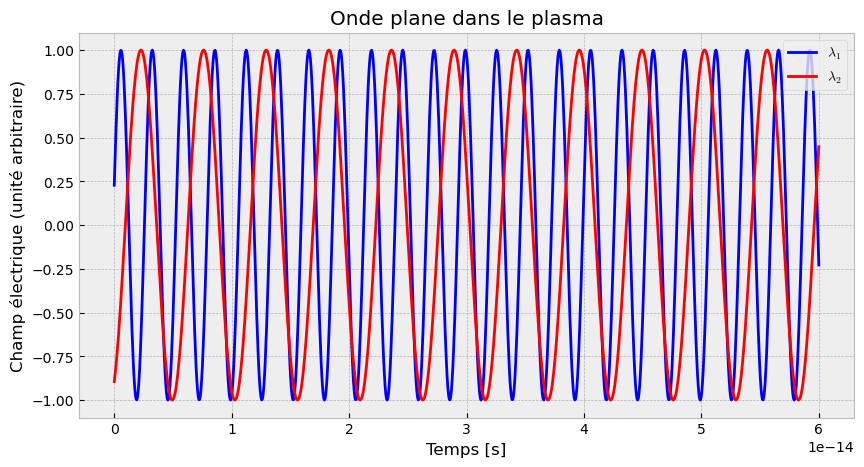

In [3]:
# Définition des données du problème
n = 1.1e24 # m^-3
omega_p = np.sqrt(n * e**2/(m * epsilon_0))

lambda_1 = 0.8e-6 # m
lambda_2 = 1.6e-6 # m
omega_1 = 2*np.pi*c/lambda_1 # rad/s
omega_2 = 2*np.pi*c/lambda_2 # rad/s

# Affichage des ondes planes dans le vide et dans le plasma, à la position x et pour t entre 0 et 60 fs
x = 2e-3 # m
t = np.linspace(0, 60e-15, 1000) # s

E_vide_1 = E_onde(k_vide(omega_1), x, omega_1, t)
E_vide_2 = E_onde(k_vide(omega_2), x, omega_2, t)

E_plasma_1 = E_onde(k_plasma(omega_1, omega_p), x, omega_1, t)
E_plasma_2 = E_onde(k_plasma(omega_2, omega_p), x, omega_2, t)

plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide_1, 'b', label="$\lambda_1$")
plt.plot(t, E_vide_2, 'r', label="$\lambda_2$")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Onde plane dans le vide")

plt.figure(2, figsize=(10,5))
plt.plot(t, E_plasma_1, 'b', label="$\lambda_1$")
plt.plot(t, E_plasma_2, 'r', label="$\lambda_2$")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Onde plane dans le plasma")

# Calcul des vitesses de phases
vphi_vide_1=omega_1/k_vide(omega_1)
vphi_vide_2=omega_2/k_vide(omega_2)

vphi_plasma_1=omega_1/k_plasma(omega_1, omega_p)
vphi_plasma_2=omega_2/k_plasma(omega_2, omega_p)

print("Vitesse de phase dans le vide, onde 1 : {:.5e}".format(vphi_vide_1))
print("Vitesse de phase dans le vide, onde 2 : {:.5e}".format(vphi_vide_2))
print("Vitesse de phase dans le plasma, onde 1 : {:.5e}".format(vphi_plasma_1))
print("Vitesse de phase dans le plasma, onde 2 : {:.5e}".format(vphi_plasma_2))

## Partie 2 : Notion de paquet d'onde.
L'objectif est de comprendre comment la superposition d'OPPH peut amener à la formation d'un paquet d'onde.
Dans le bloc suivant, on trace la superposition de deux OPPH de fréquences proches se propageant dans le vide. On étudie ensuite la superposition d'un grand nombre d'OPPH se propageant dans le vide.

Text(0.5, 1.0, 'Superposition de 2 OPPH dans le vide')

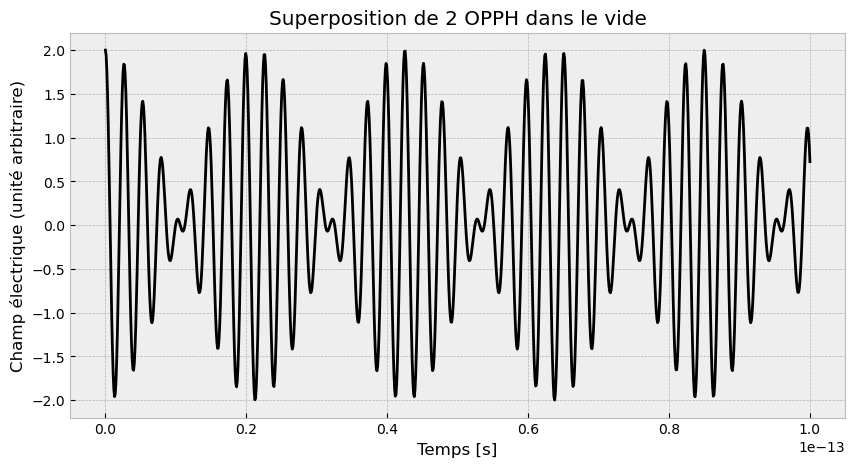

In [4]:
# Définition des données du problème
lambda_1 = 0.75e-6 # m
lambda_2 = 0.85e-6 # m
omega_1 = 2*np.pi*c/lambda_1 # rad/s
omega_2 = 2*np.pi*c/lambda_2 # rad/s

# Affichage de la superposition des deux OPPH dans le vide, à la position x=0 m et pour t entre 0 et 150 fs
x = 0 # m
t = np.linspace(0, 100e-15, 1000) # s

E_vide_1 = E_onde(k_vide(omega_1), x, omega_1, t)
E_vide_2 = E_onde(k_vide(omega_2), x, omega_2, t)

plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide_1 + E_vide_2, 'k')
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Superposition de 2 OPPH dans le vide")

**Q2.1 :** On se place à $x=0$. Expliquer le comportement observé (on pourra s'appuyer sur les formules trigonométriques). Comment s'appelle ce phénomène (vu en 1ère année) ?

*On a une somme de cosinus que l'on peut ré-exprimer sous la forme d'un produit de cosinus oscillant à des pulsations $(\omega_1 + \omega_2)/2$ et $(\omega_1-\omega_2)/2$, ce qui est caractéristique du phénomène de battements.*

Text(0.5, 1.0, "Superposition d'un grand nombre d'OPPH de fréquences proches dans le vide.")

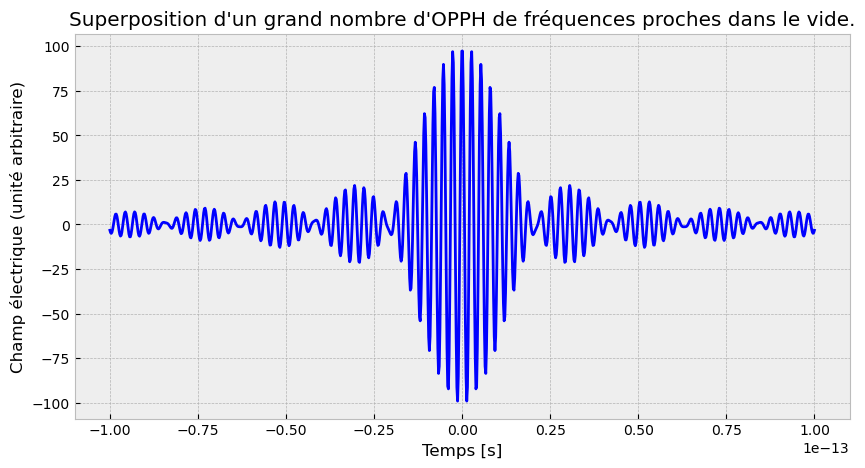

In [5]:
# Données du problème
x = 0.0 # m
t = np.linspace((x-30e-6)/c, (x+30e-6)/c, 1000) # s, on centre l'affichage sur le maximum de l'onde dans le vide

# Calcul du champ électrique
E_vide = 0.
for lambda_vide in np.linspace(750e-9, 850e-9, 100):
    omega = 2*np.pi*c/lambda_vide
    E_vide = E_vide + E_onde(k_vide(omega), x, omega, t)

# Affichages
plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide, 'b')
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Superposition d'un grand nombre d'OPPH de fréquences proches dans le vide.")

**Q2.2 :** Décrire le fonctionnement de la partie "calcul du champ électrique" du code précédent. Qu'est ce que cela change sur l'allure finale du champ électrique par rapport au cas précédent ? Comment l'expliquer ? On notera que la présence de temps négatifs est simplement liée à la manière dont on a défini l'origine des temps, ce qui ne doit pas être choquant ici.

*Le code calcule l'amplitude du champ électrique à $x=0$ pour les temps considérés pour 100 longueurs d'ondes réparties uniformément entre 750 et 850 nm. Le champ électrique résultant est la somme de toutes ces contributions. Par rapport aux battements obtenus avec seulement 2 longueurs d'ondes, on observe la formation d'un paquet d'onde d'amplitude importante au centre de la figure, car toutes les composantes sont en phase à cet endroit. La forme du paquet d'onde est liée à la transformée de Fourier du spectre ; un spectre en forme de créneau donnant un paquet d'onde de forme sinus cardinal.*

## Partie 3 : Propagation d'un paquet d'onde gaussien dans un milieu non absorbant et dispersif
En réalité, une onde électromagnétique est toujours localisée dans l'espace (autrement son énergie serait infinie), mais peut ici s'écrire comme une superposition d'ondes planes non localisées. On s'intéresse donc finalement à un paquet d'onde de forme gaussienne se propageant dans le vide ou dans un plasma. Cette situation peut alors modéliser un laser se propageant dans un jet de gaz ionisé, qui est une configuration très étudiée dans la recherche pour accélérer des électrons par laser (l'accélération d'électrons ne pouvant pas être décrite par le modèle simple utilisé ici).

Text(0.5, 1.0, "Paquet d'onde dans le vide ou dans un plasma")

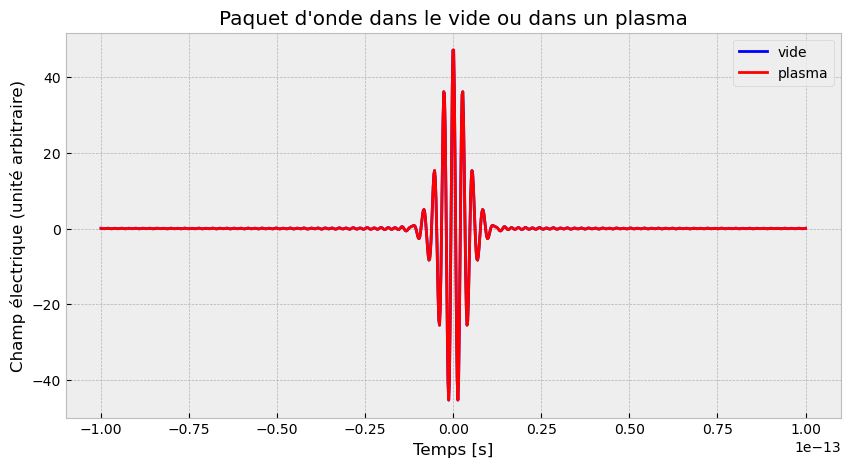

In [6]:
# Données du problème
# Sources pour données laser : https://www.researchgate.net/figure/2-Absorption-and-emission-spectra-of-the-Tisapphire-laser-The-broad-character-of-the_fig1_280611286
x = 0.0 # m
t = np.linspace((x-30e-6)/c, (x+30e-6)/c, 1000) # s, on centre l'affichage sur le maximum de l'onde dans le vide

n=1.1e24 # densité électronique du plasma
omega_p = np.sqrt(n*e**2/(m * epsilon_0))
lambda_moyen = 800e-9 # Longueur d'onde moyenne du laser, typique des laser titane-saphir
sigma_lambda = 100e-9 # écart type de la gaussienne en longueur d'onde, typique des laser titane-saphir

# Calcul du champ électrique
E_vide = 0.
E_plasma=0.
for lambda_vide in np.linspace(600e-9, 1100e-9, 100):
    omega = 2*np.pi*c/lambda_vide
    A = np.exp(-(lambda_vide-lambda_moyen)**2/(2*(sigma_lambda)**2)) # Paquet d'onde de forme gaussienne
    E_vide = E_vide + A*E_onde(k_vide(omega), x, omega, t)
    E_plasma = E_plasma + A*E_onde(k_plasma(omega, omega_p), x, omega, t)

# Affichages
plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide, '-b', label="vide")
plt.plot(t, E_plasma, '-r', label="plasma")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Paquet d'onde dans le vide ou dans un plasma")

**Q3.1 :** On se place dans le cas où deux paquets d'onde ont la même forme en $x=0$ et $t=0$, puis se propagent respectivement dans le vide ou dans un plasma selon les $x$ positifs. On observe ensuite la forme des paquets d'ondes après une propagation de $1 ~\rm cm$. Comparez la forme du paquet d'onde après propagation dans le vide et dans le plasma (position et valeur de l'amplitude maximale, durée typique des paquets d'onde), et proposez une explication du phénomène.

*Par rapport au comportement dans le vide, le paquet d'onde dans le plasma arrive à la position $x=1 ~\rm cm$ avec un léger retard, une amplitude plus faible et avec une durée typique plus importante. Ce comportement est interprété comme la conséquence de la dispersion dans le plasma. En effet, les composantes ne se propageant pas à la même vitesse de phase, le paquet d'onde s'étale temporellement, ce qui fait par ailleurs diminuer l'amplitude maximale (l'énergie totale étant conservée). On observe aussi que la vitesse de groupe de l'impulsion s'étant propagée dans le plasma est inférieure à $c$ (correspondant à la vitesse de groupe du paquet d'onde dans le vide).*

Text(0.5, 1.0, "Paquet d'onde dans le vide ou dans un plasma")

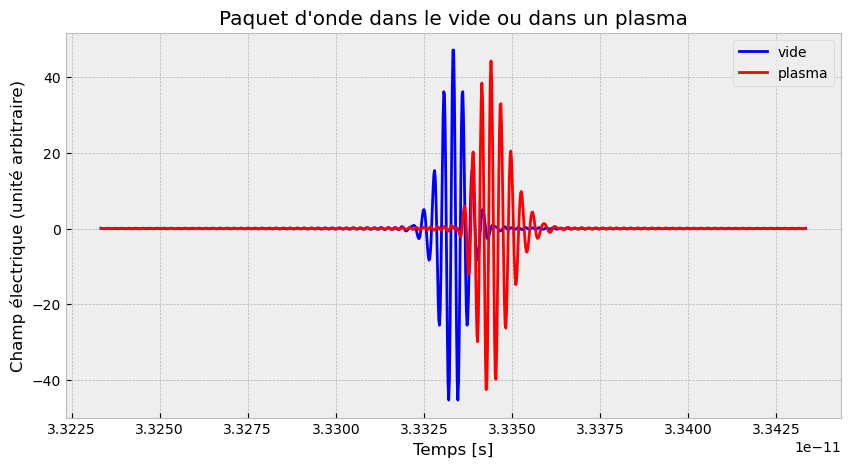

In [7]:
# Données du problème
# Sources pour données laser : https://www.researchgate.net/figure/2-Absorption-and-emission-spectra-of-the-Tisapphire-laser-The-broad-character-of-the_fig1_280611286
x = 1e-2 # m
t = np.linspace((x-30e-6)/c, (x+30e-6)/c, 1000) # s, on centre l'affichage sur le maximum de l'onde dans le vide

n=1.1e24 # densité électronique du plasma
omega_p = np.sqrt(n*e**2/(m * epsilon_0))
lambda_moyen = 800e-9 # Longueur d'onde moyenne du laser, typique des laser titane-saphir
sigma_lambda = 100e-9 # écart type de la gaussienne en longueur d'onde, typique des laser titane-saphir

# Calcul du champ électrique
E_vide = 0.
E_plasma=0.
for lambda_vide in np.linspace(600e-9, 1100e-9, 100):
    omega = 2*np.pi*c/lambda_vide
    A = np.exp(-(lambda_vide-lambda_moyen)**2/(2*(sigma_lambda)**2)) # Paquet d'onde de forme gaussienne
    E_vide = E_vide + A*E_onde(k_vide(omega), x, omega, t)
    E_plasma = E_plasma + A*E_onde(k_plasma(omega, omega_p), x, omega, t)

# Affichages
plt.figure(1, figsize=(10,5))
plt.plot(t, E_vide, '-b', label="vide")
plt.plot(t, E_plasma, '-r', label="plasma")
plt.legend(loc=1)
plt.xlabel("Temps [s]")
plt.ylabel("Champ électrique (unité arbitraire)")
plt.title("Paquet d'onde dans le vide ou dans un plasma")

**Q3.2 :** Pour l'application de l'accélération d'électrons par laser, il est nécessaire que l'impulsion laser conserve sa forme spatio-temporelle sur des distances importantes (typiquement jusqu'à quelques cm). Pour des paramètres lasers fixés (longueur d'onde, durée et taille typique), comment pourrait on essayer de minimiser l'influence de la dispersion ?

*Pour ceci, on peut par exemple diminuer la densité électronique afin d'abaisser la pulsation plasma électronique, de façon tendre le plus possible vers le comportement obtenu dans le vide (cf relation de dispersion dans la suite). Néanmoins, il n'est pas possible de trop diminuer la densité d'électrons car les mécanismes d'accélération d'électrons nécessitent que celle-ci soit suffisament importante. Pour les lasers Ti:Sa, une densité électronique de $10^{23} m^{-3}$ est souvent utilisée en pratique.*

(0.0, 3000000000000000.0)

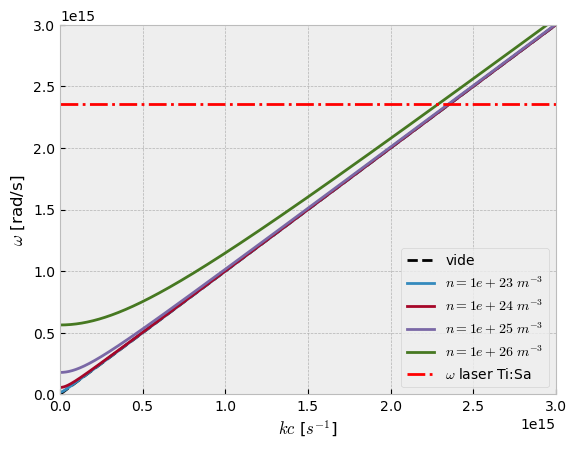

In [8]:
kc = np.linspace(0, 3e15, 1000)

plt.figure(1)
plt.plot(kc, kc, '--k', label="vide")
for n in [1e23, 1e24, 1e25, 1e26]:
    omega_p = np.sqrt(n*e**2/(m * epsilon_0))
    omega = np.sqrt(omega_p**2 + kc**2)
    plt.plot(kc, omega, label="$n={:.0e} ~ {:s}$".format(n,"m^{-3}"))

plt.hlines(2*np.pi*c/0.8e-6, min(kc), max(kc), color="r", ls='-.', label="$\omega$ laser Ti:Sa")
plt.legend(loc=4)
plt.xlabel("$kc$ [$s^{-1}$]")
plt.ylabel("$\omega$ [rad/s]")
plt.xlim(min(kc), max(kc))
plt.ylim(min(kc), max(kc))